In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn as skl
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe().transpose()

count        mean        std     min     25%    50%     75%  \
male             4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
male               1.0  
age               70.0  
education          4.0  
currentSmoker      1.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
diabetes           1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

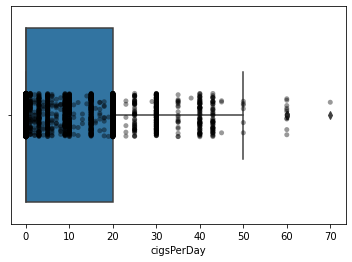

In [6]:
sns.boxplot(x=df['cigsPerDay'])
sns.stripplot(x=df['cigsPerDay'],size =5, color = 'black', alpha=0.4)

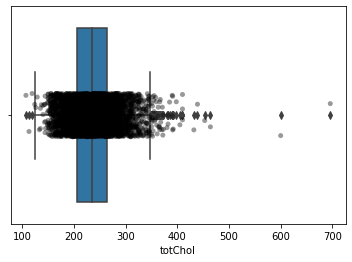

In [7]:
sns.boxplot(x=df['totChol'])
sns.stripplot(x=df['totChol'],size =5, color = 'black', alpha=0.4)

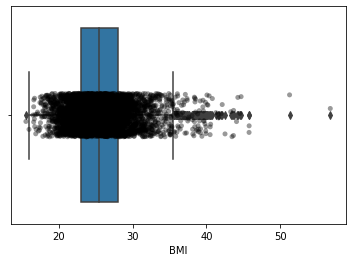

In [8]:
sns.boxplot(x=df['BMI'])
sns.stripplot(x=df['BMI'],size =5, color = 'black', alpha=0.4)

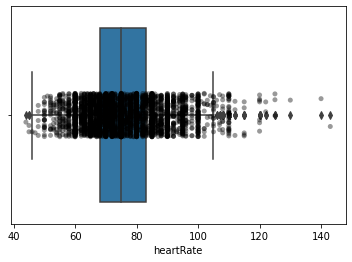

In [9]:
sns.boxplot(x=df['heartRate'])
sns.stripplot(x=df['heartRate'],size =5, color = 'black', alpha=0.4)

C:\Users\sunita\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sunita\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sunita\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sunita\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sunita\Documents\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: inv

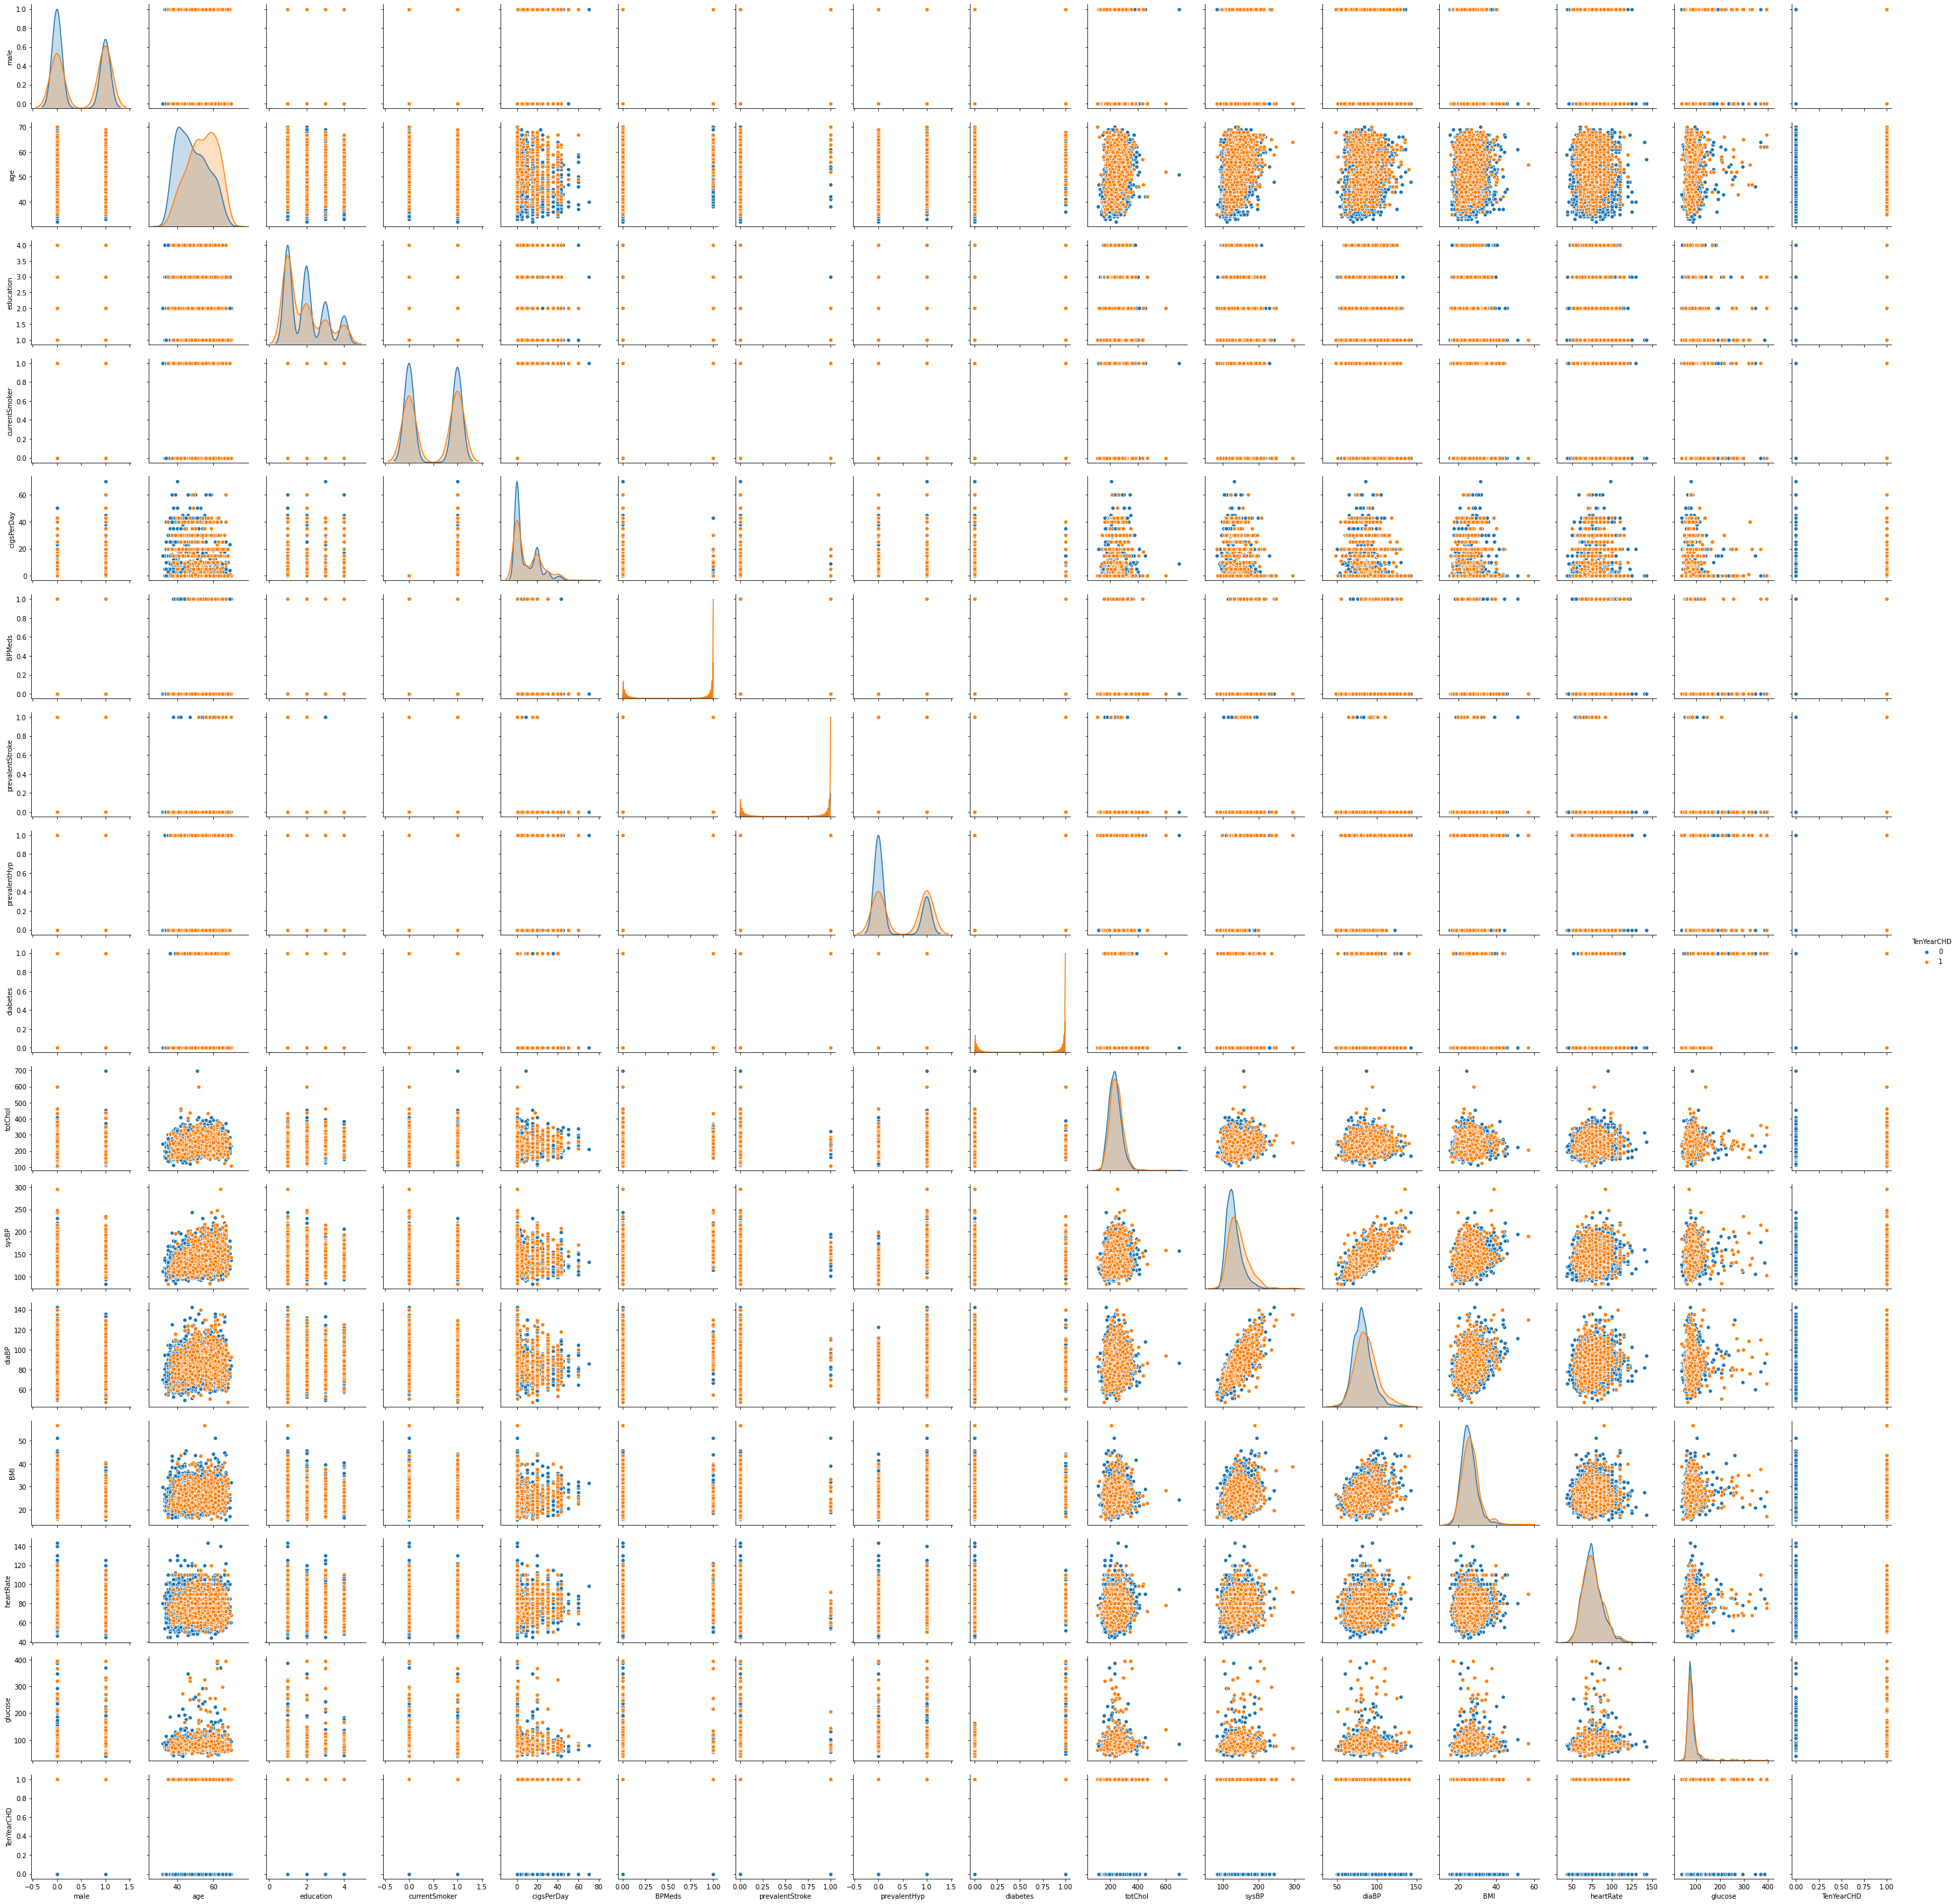

In [10]:
sns.pairplot(df, hue = "TenYearCHD")

C:\Users\sunita\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sunita\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


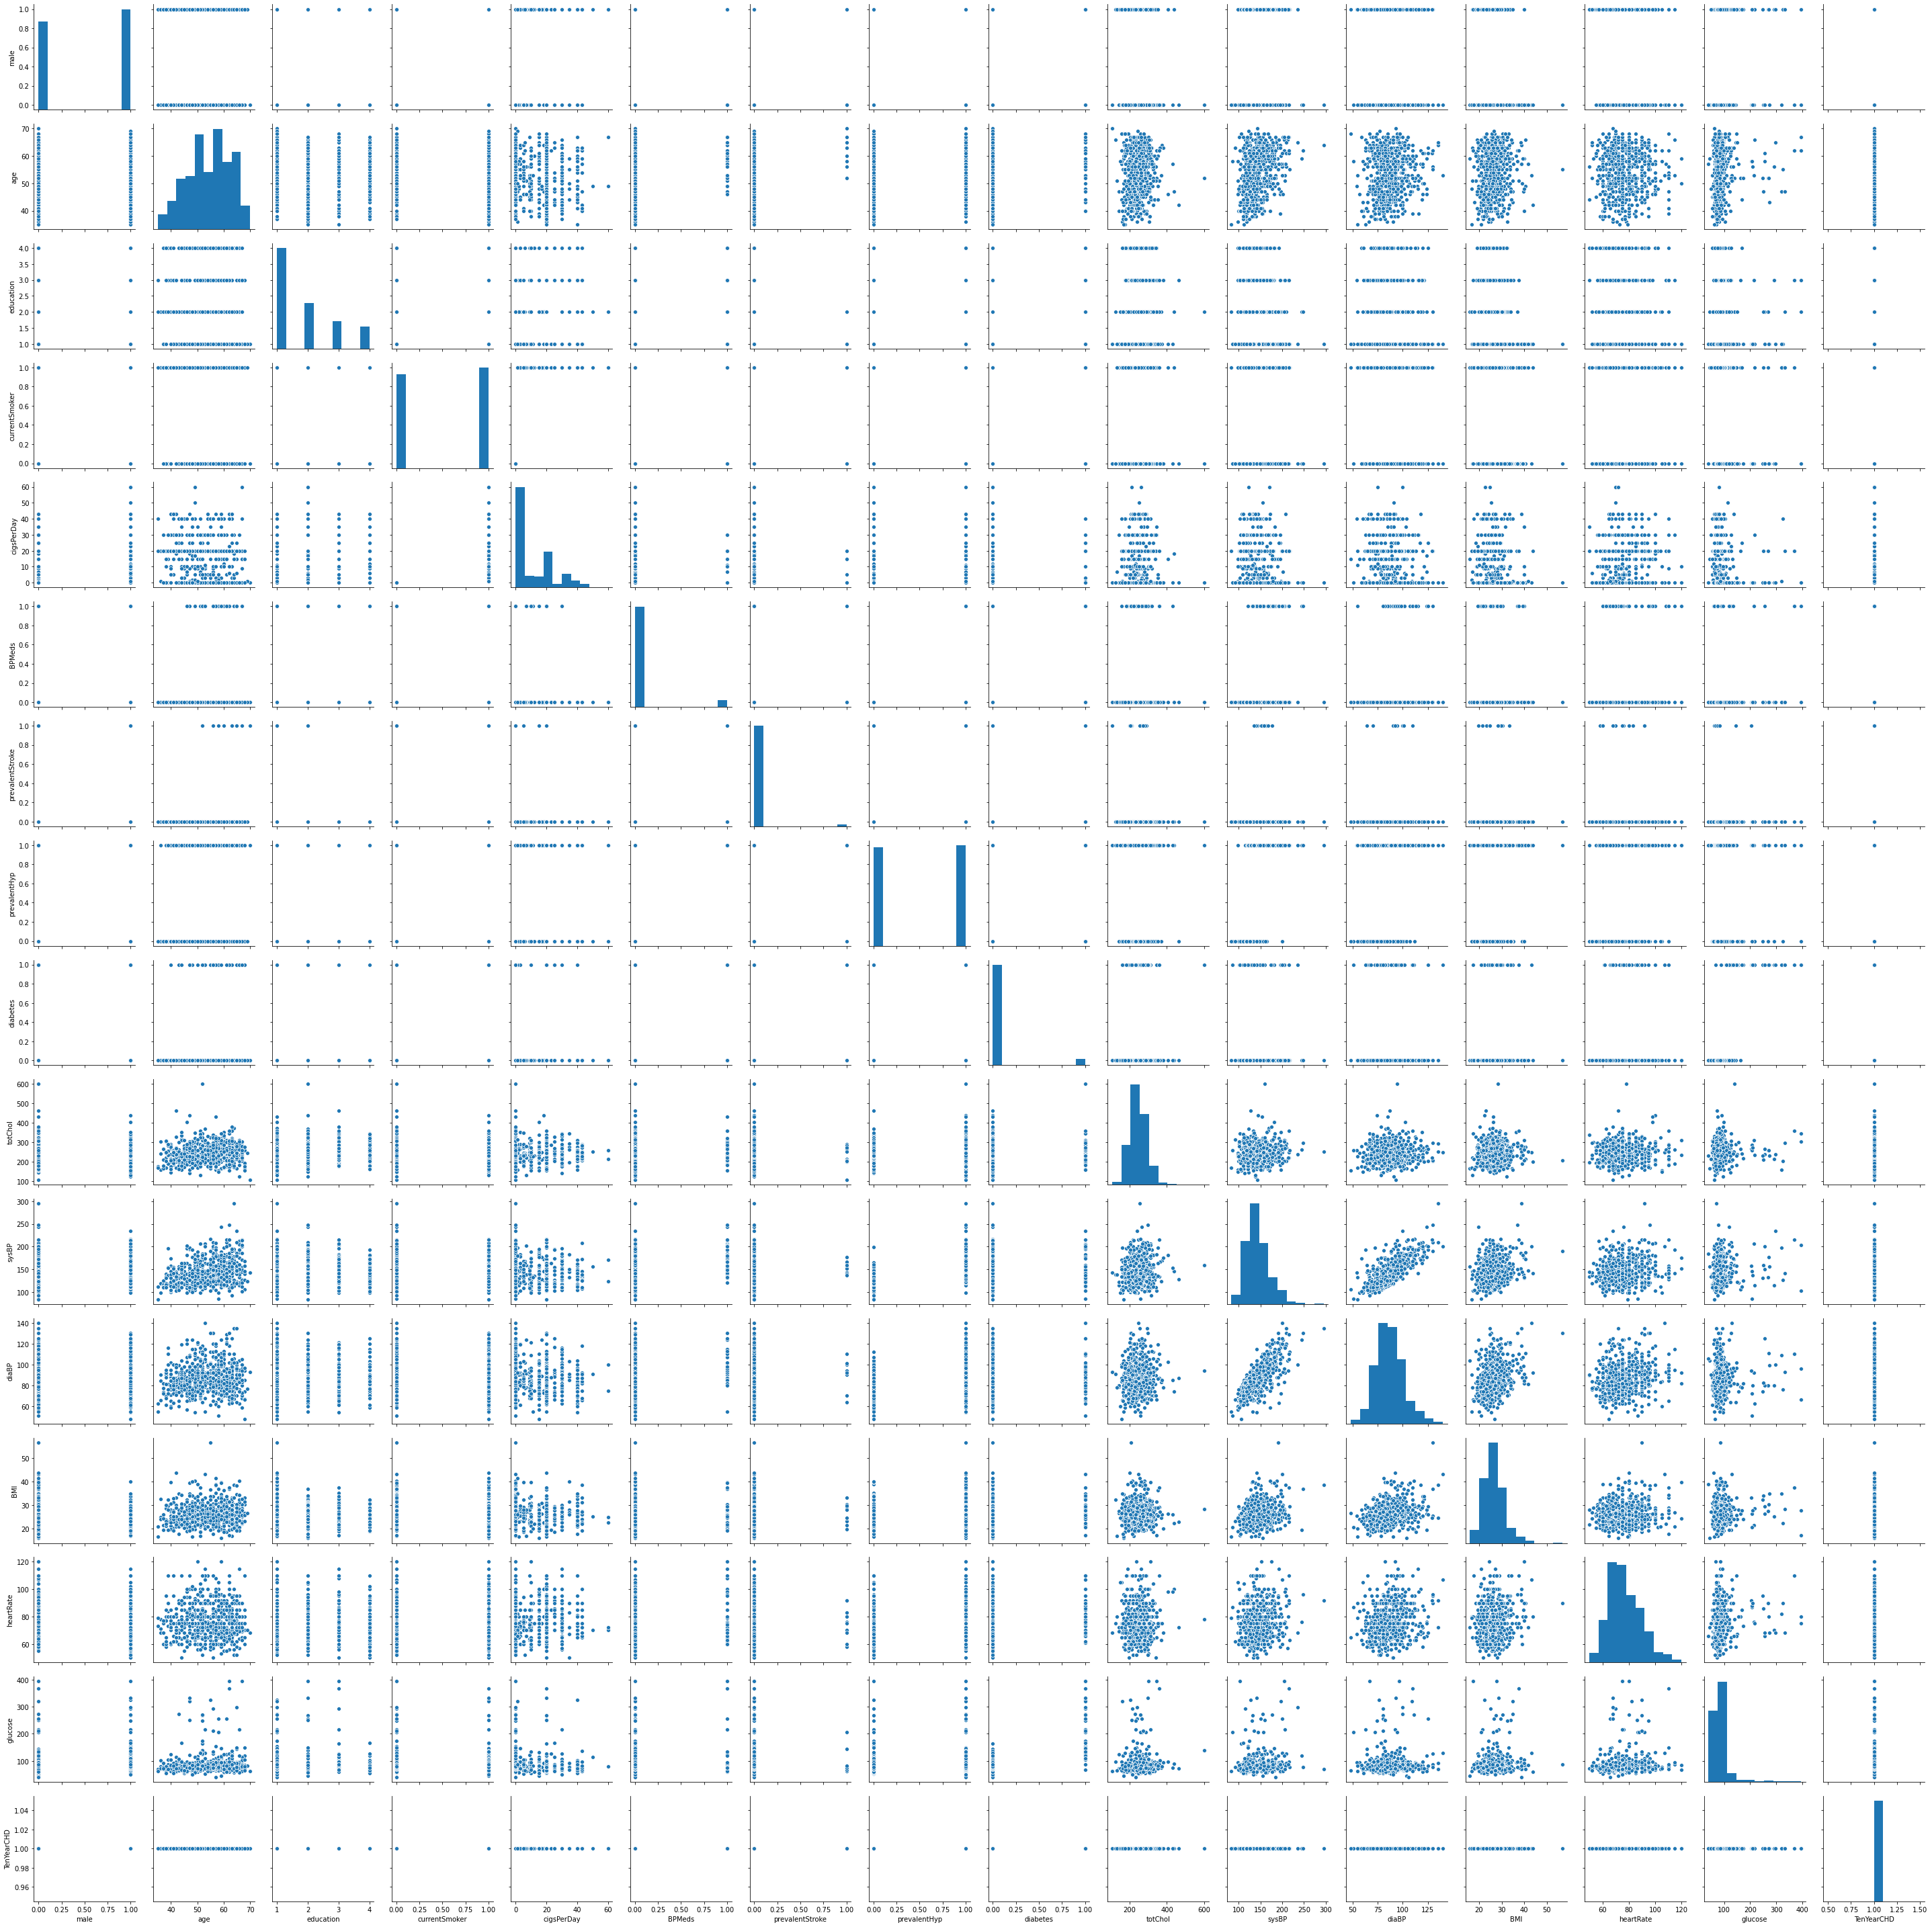

In [11]:
CHD_yes = df[df['TenYearCHD']==1]
CHD_yes.head()
sns.pairplot(CHD_yes)

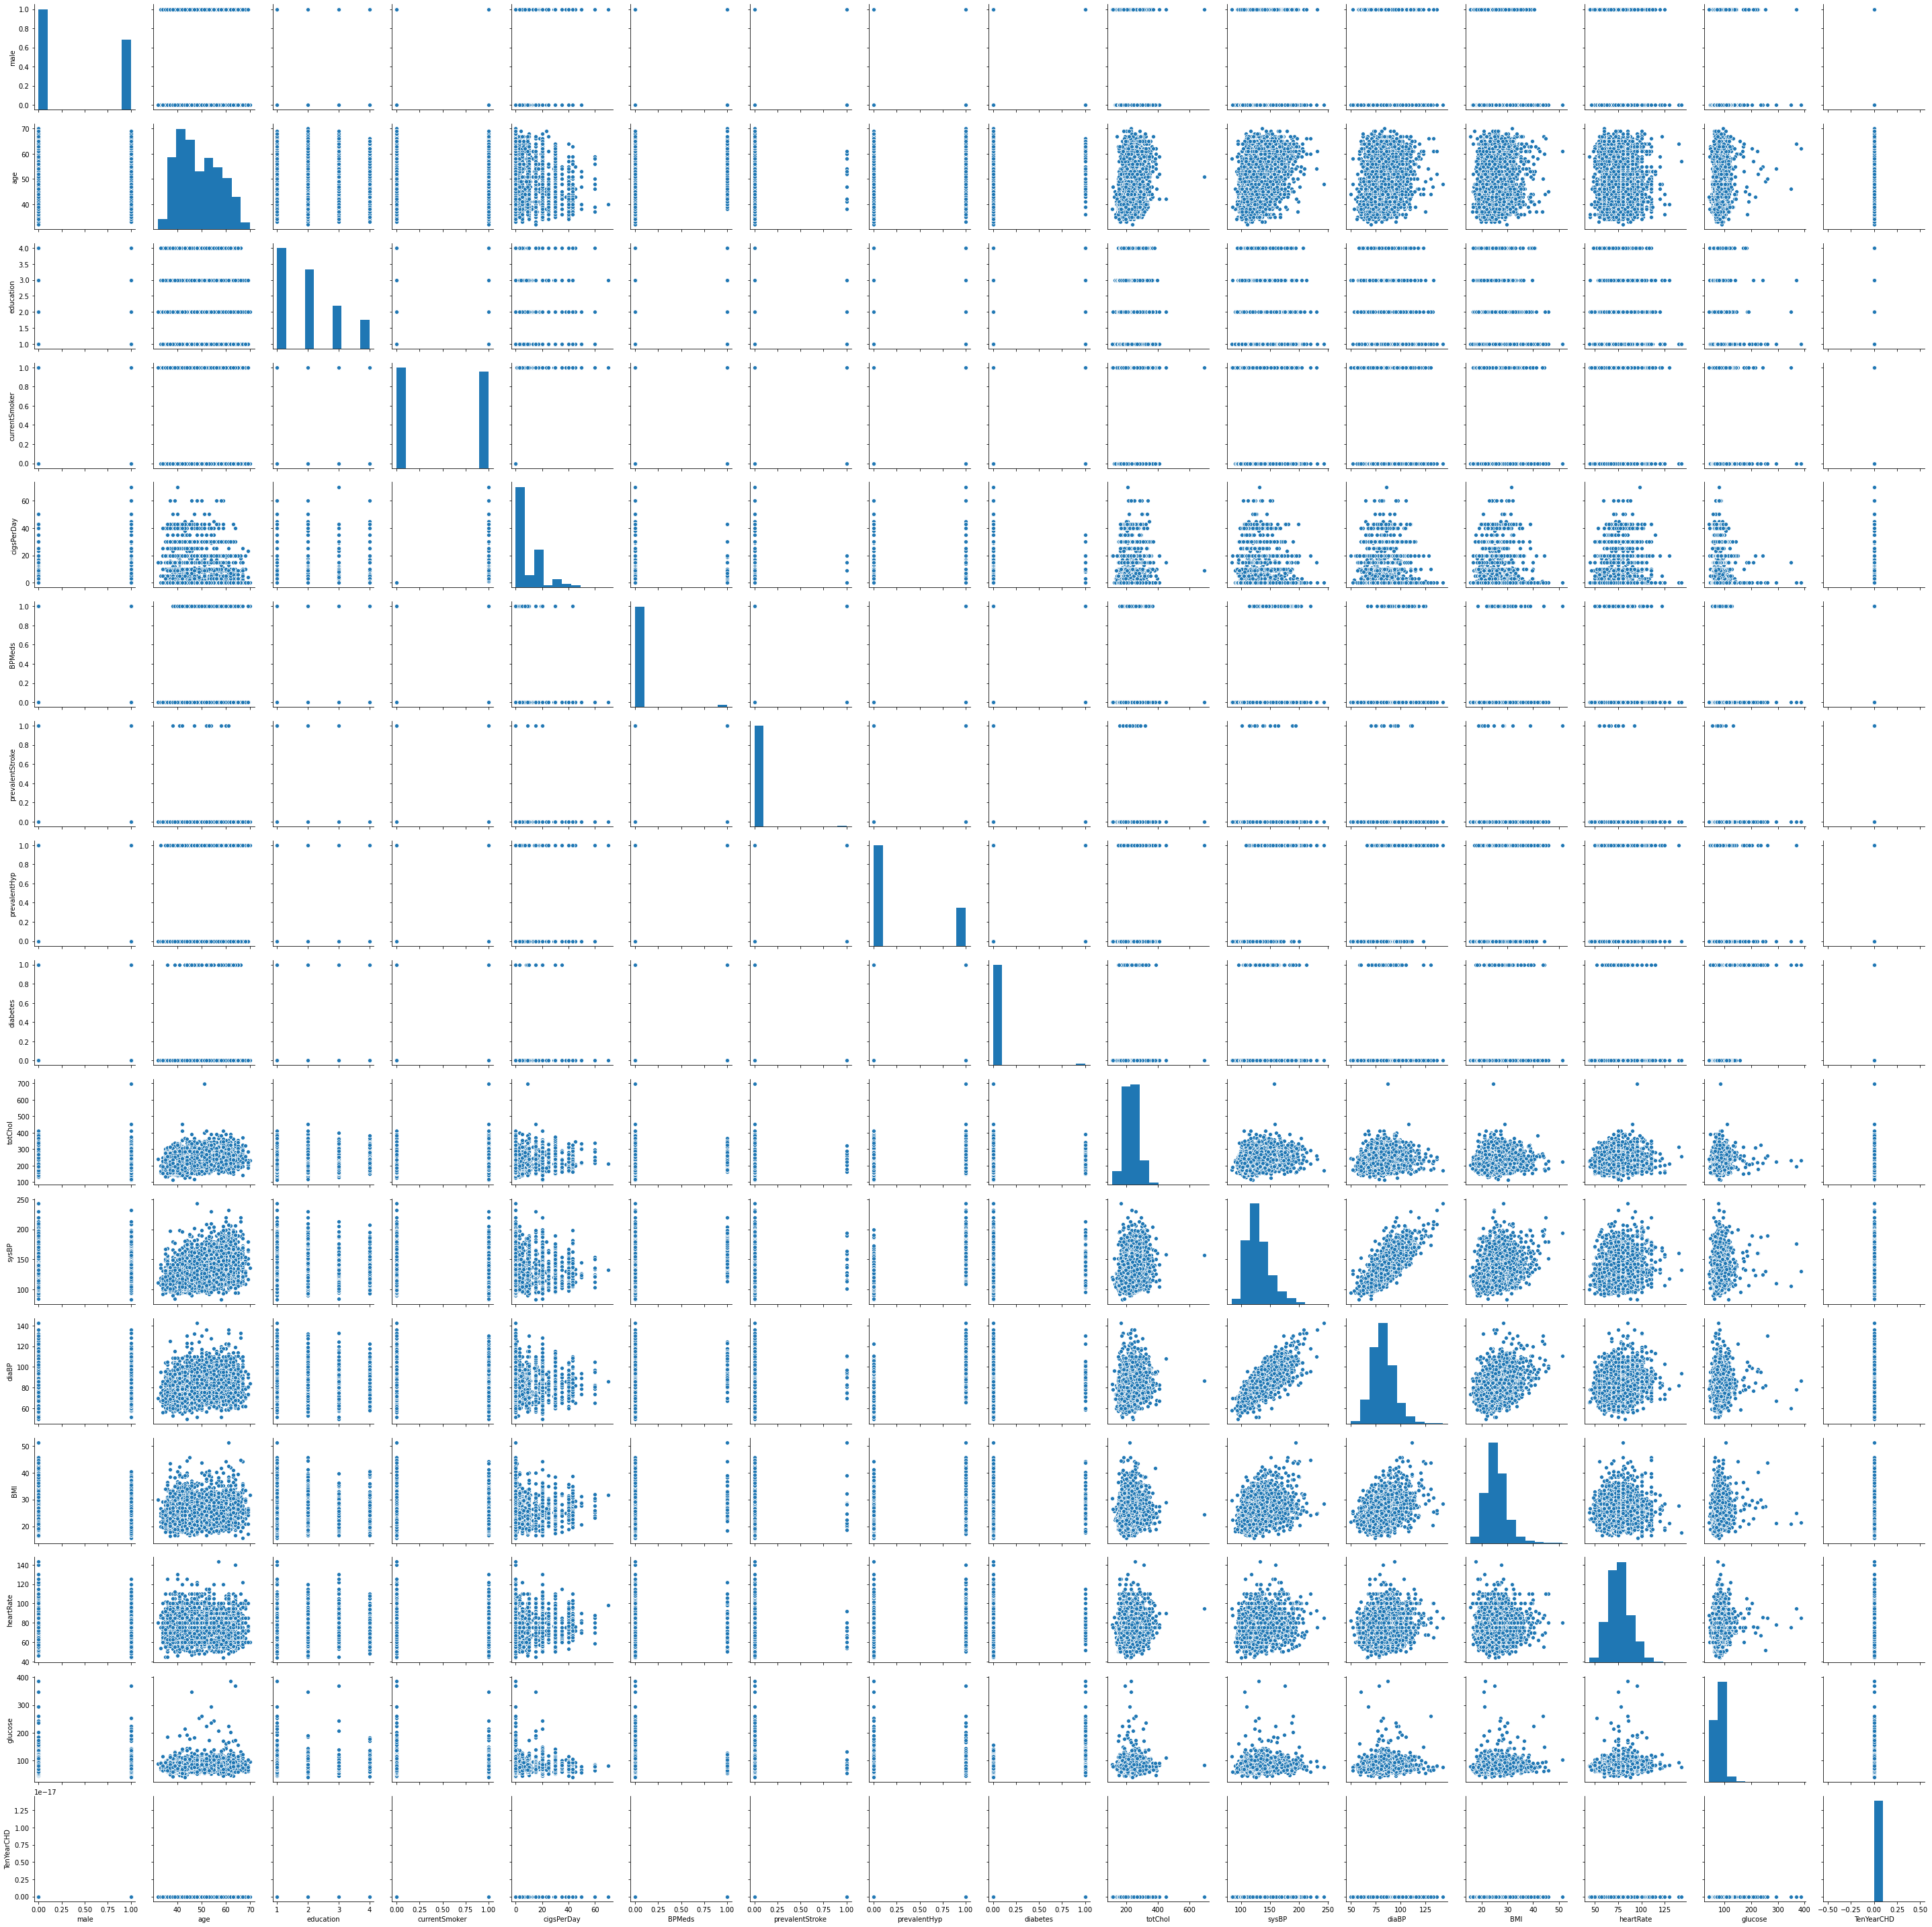

In [12]:
CHD_no = df[df['TenYearCHD']==0]
CHD_no.head()
sns.pairplot(CHD_no)

In [13]:
CHD_yes.head(1)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
3     0   61        3.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   

   TenYearCHD  
3           1

In [14]:
CHD_no.head(1)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   

   TenYearCHD  
0           0

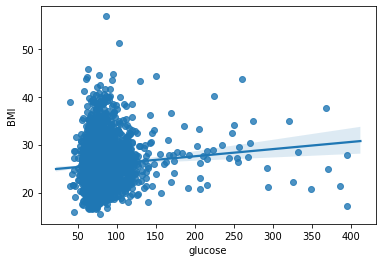

In [16]:
sns.regplot(x='glucose', y='BMI', data = df)

In [17]:
df.corr()

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.017415       0.197026    0.317143   
age             -0.029014  1.000000  -0.166356      -0.213662   -0.192959   
education        0.017415 -0.166356   1.000000       0.018528    0.008323   
currentSmoker    0.197026 -0.213662   0.018528       1.000000    0.769774   
cigsPerDay       0.317143 -0.192959   0.008323       0.769774    1.000000   
BPMeds          -0.052504  0.123052  -0.010898      -0.048927   -0.046155   
prevalentStroke -0.004550  0.057679  -0.035142      -0.032980   -0.032711   
prevalentHyp     0.005853  0.306799  -0.081726      -0.103710   -0.066645   
diabetes         0.015693  0.101314  -0.038749      -0.044285   -0.037089   
totChol         -0.070413  0.262554  -0.023613      -0.046488   -0.026479   
sysBP           -0.035879  0.394053  -0.129496      -0.130281   -0.088797   
diaBP            0.058199  0.205586  -0.061919      -0.107933   -0.056715   
BMI              0.081871  0.136096  -0.137747      -0.167857   -0.093293   
heartRate       -0.116932 -0.012843  -0.054182       0.062686    0.075564   
glucose          0.005979  0.122356  -0.035843      -0.056726   -0.058886   
TenYearCHD       0.088374  0.225408  -0.054248       0.019448    0.057755   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052504        -0.004550      0.005853  0.015693 -0.070413   
age              0.123052         0.057679      0.306799  0.101314  0.262554   
education       -0.010898        -0.035142     -0.081726 -0.038749 -0.023613   
currentSmoker   -0.048927        -0.032980     -0.103710 -0.044285 -0.046488   
cigsPerDay      -0.046155        -0.032711     -0.066645 -0.037089 -0.026479   
BPMeds           1.000000         0.117370      0.261067  0.052060  0.080623   
prevalentStroke  0.117370         1.000000      0.074791  0.006955  0.000105   
prevalentHyp     0.261067         0.074791      1.000000  0.077752  0.163632   
diabetes         0.052060         0.006955      0.077752  1.000000  0.040348   
totChol          0.080623         0.000105      0.163632  0.040348  1.000000   
sysBP            0.254194         0.057000      0.696656  0.111265  0.208734   
diaBP            0.194122         0.045153      0.615840  0.050260  0.164698   
BMI              0.100702         0.025909      0.301344  0.087068  0.115992   
heartRate        0.015230        -0.017674      0.146815  0.048986  0.091127   
glucose          0.051197         0.018440      0.086656  0.617630  0.046538   
TenYearCHD       0.087519         0.061823      0.177458  0.097344  0.082369   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035879  0.058199  0.081871  -0.116932  0.005979    0.088374  
age              0.394053  0.205586  0.136096  -0.012843  0.122356    0.225408  
education       -0.129496 -0.061919 -0.137747  -0.054182 -0.035843   -0.054248  
currentSmoker   -0.130281 -0.107933 -0.167857   0.062686 -0.056726    0.019448  
cigsPerDay      -0.088797 -0.056715 -0.093293   0.075564 -0.058886    0.057755  
BPMeds           0.254194  0.194122  0.100702   0.015230  0.051197    0.087519  
prevalentStroke  0.057000  0.045153  0.025909  -0.017674  0.018440    0.061823  
prevalentHyp     0.696656  0.615840  0.301344   0.146815  0.086656    0.177458  
diabetes         0.111265  0.050260  0.087068   0.048986  0.617630    0.097344  
totChol          0.208734  0.164698  0.115992   0.091127  0.046538    0.082369  
sysBP            1.000000  0.783952  0.326906   0.182155  0.140573    0.216374  
diaBP            0.783952  1.000000  0.377360   0.181021  0.061075    0.145112  
BMI              0.326906  0.377360  1.000000   0.067451  0.087389    0.075300  
heartRate        0.182155  0.181021  0.067451   1.000000  0.094546    0.022907  
glucose          0.140573  0.061075  0.087389   0.094546  1.000000    0.125590  
TenYearCHD       0.216374  0.145112  0.075300   0.0229

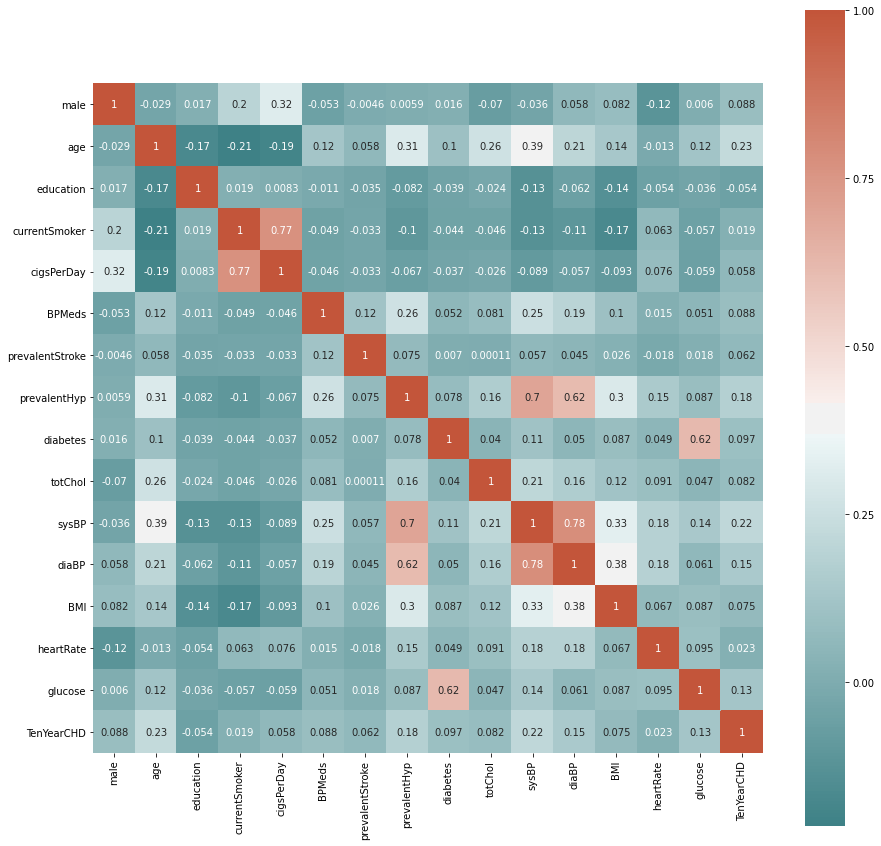

In [18]:
cmap = sns.diverging_palette(200, 20, as_cmap = True)
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = cmap, square = True)

In [19]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
df_modified = df.fillna(method='ffill')
df_modified.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

Forward fill method to resolve null values

In [21]:
df_modified.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
independent = df_modified.iloc[:, :-1].values
dependent = df_modified.iloc[:, -1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.35, random_state = 0)

In [24]:
X_train.shape

(2756, 15)

In [25]:
X_test.shape

(1484, 15)

In [26]:
y_train.shape

(2756,)

In [27]:
y_test.shape

(1484,)

In [28]:
modelL = LogisticRegression(random_state = 0)
modelL.fit(X_train, y_train)

C:\Users\sunita\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
score_train = modelL.score(X_train,y_train)
print(score_train)

0.8519593613933236


In [30]:
cm = confusion_matrix(dependent,modelL.predict(independent))

In [31]:
print(cm)

[[3591    5]
 [ 614   30]]


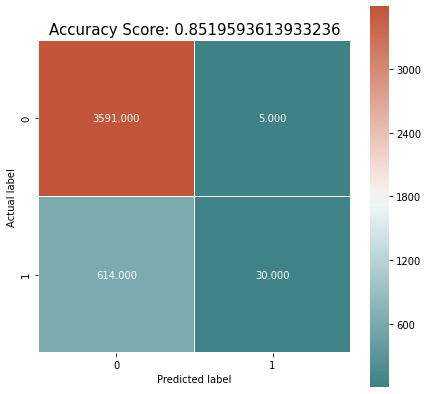

In [32]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = cmap);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train)
plt.title(all_sample_title, size = 15);

In [33]:
print(classification_report(dependent,modelL.predict(independent)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3596
           1       0.86      0.05      0.09       644

    accuracy                           0.85      4240
   macro avg       0.86      0.52      0.50      4240
weighted avg       0.85      0.85      0.79      4240



In [34]:
y_pred = modelL.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1260    1]
 [ 210   13]]


0.8578167115902965

In [36]:
score_test = modelL.score(X_test,y_test)
print(score_test)

0.8578167115902965


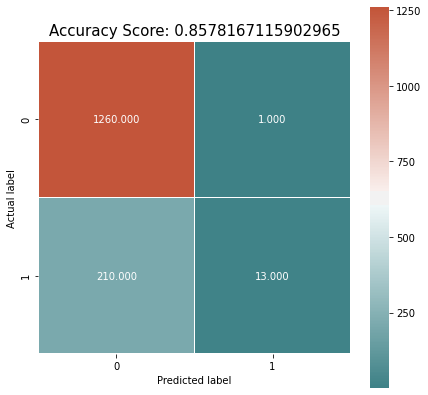

In [37]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = cmap);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15);


In [38]:
print(modelL.coef_, modelL.intercept_)

[[ 5.19674525e-01  4.82181085e-02 -4.78431745e-02 -3.83570435e-02
   1.89465970e-02  1.91466928e-01  7.07013254e-01  5.38842418e-01
   2.03704692e-01  6.44440120e-04  1.20883086e-02 -1.24630380e-02
  -5.87793446e-03 -6.10919552e-03  4.10568385e-03]] [-5.19274062]


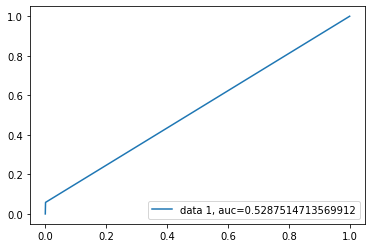

In [39]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
est = sm.OLS(y_train, X_train)

In [41]:
est2 = est.fit()

In [42]:
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.216
Method:                 Least Squares   F-statistic:                              51.71
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                   3.62e-136
Time:                        13:43:39   Log-Likelihood:                         -978.11
No. Observations:                2756   AIC:                                      1986.
Df Residuals:                    2741   BIC:                                      2075.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------